## 케글 타이타닉 연습

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

import re
import os

plt.style

warnings.filterwarnings("ignore")
%matplotlib inline

# Read the datasets
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
IDtest = test["PassengerId"]
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [2]:
train.info()
"""
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'\nRangeIndex: 891 entries, 0 to 890\nData columns (total 12 columns):\n'

In [3]:
#  훈련 데이터셋 결측치비율 확인
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending = False)[:30]
miss_train = pd.DataFrame({"Train Missing Ratio":train_na})
miss_train.head()

,Train Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


pclass : 범주형 변수

In [4]:
# 훈련 / 테스트 데이터 셋 결측치 처리
train = train.fillna(np.nan)
test = test.fillna(np.nan)

,Survived
Pclass,
3,491
1,216
2,184


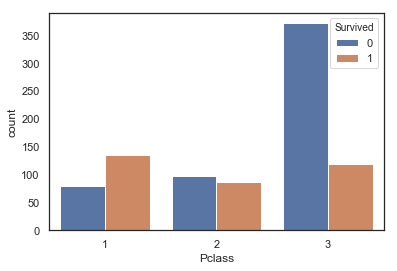

In [5]:
# pclass 변수에 따른 생존자 수
# sns.countplot : 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.
ax = sns.countplot(x = "Pclass", hue="Survived", data =train)
train[["Pclass", "Survived"]].groupby(["Pclass"]).count().sort_values(by = "Survived", ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


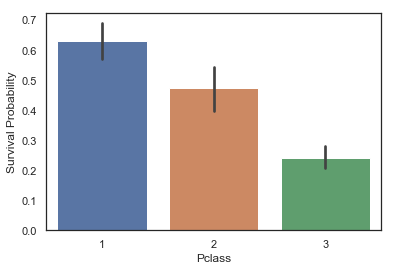

In [6]:
#  Pclass 변수에 따른 생존자 비율
# sns.barplot :  카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.
g = sns.barplot(x="Pclass", y = "Survived", data = train)
g = g.set_ylabel("Survival Probability")
train[["Pclass", "Survived"]].groupby(["Pclass"]).mean().sort_values(by = "Survived", ascending = False)

Sex  
-아래의 분석에 따르면 여자의 생존률이 더 높다
 

,Survived
Sex,
male,577
female,314


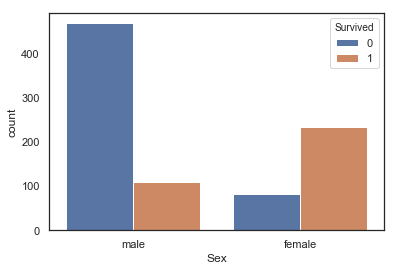

In [7]:
# 성별에 따른 승객 수
ax = sns.countplot(x = "Sex", hue = "Survived", data = train)
train[["Sex", "Survived"]].groupby(["Sex"]).count().sort_values(by = "Survived", ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


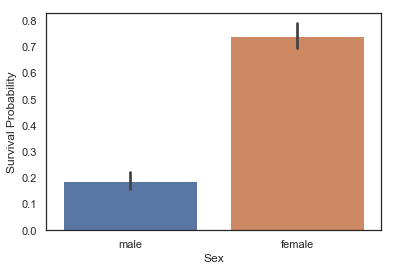

In [8]:
# 성별에 따른 승객 비율
g = sns.barplot(x = "Sex", y = "Survived", data = train)
g = g.set_ylabel("Survival Probability")
train[["Sex", "Survived"]].groupby(["Sex"]).mean().sort_values(by = "Survived", ascending = False)

Age  
나이는 영화의 한 대사중 아이와 여성먼저라는 대사를 통해 분석에 활용

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0, 0.5, 'Frequency')

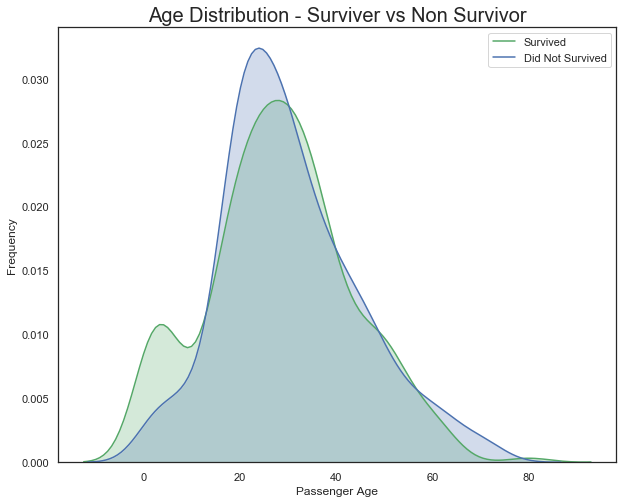

In [9]:
# 종속변수에 따른 나이(age)의 분포 탐색
# sns.kdeplot : 커널밀도 곡선
# shade = 곡선 아래의 공간을 음영 처리할지 결정 
fig = plt.figure(figsize = (10,8))
axis = sns.kdeplot(train.loc[(train["Survived"] == 1) , "Age"], c = "g", shade = True, label = "Survived")
axis = sns.kdeplot(train.loc[(train["Survived"] == 0), "Age"], c= "b", shade = True, label = "Did Not Survived")
plt.title("Age Distribution - Surviver vs Non Survivor", fontsize = 20)
plt.xlabel("Passenger Age", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

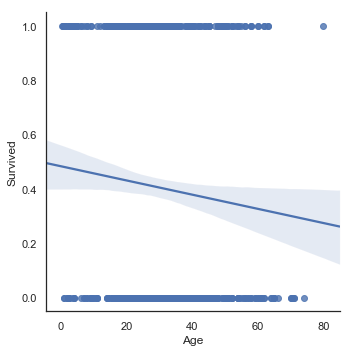

In [10]:
# lmplot : 선형으로 상관관계 파악
sns.lmplot("Age", "Survived", data = train)

SibSp(함께 탑승한 형쪠 또는 배우자 수)

,Survived
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


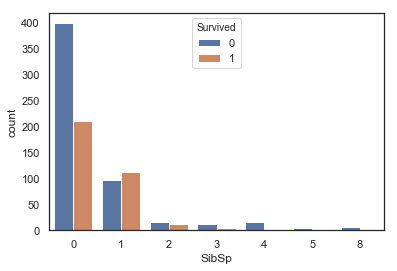

In [11]:
# 형제 수에 따른 생존자 수
ax = sns.countplot(x = "SibSp", hue = "Survived", data = train)
train[["SibSp", "Survived"]].groupby(["SibSp"]).count().sort_values(by = "Survived", ascending = False)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


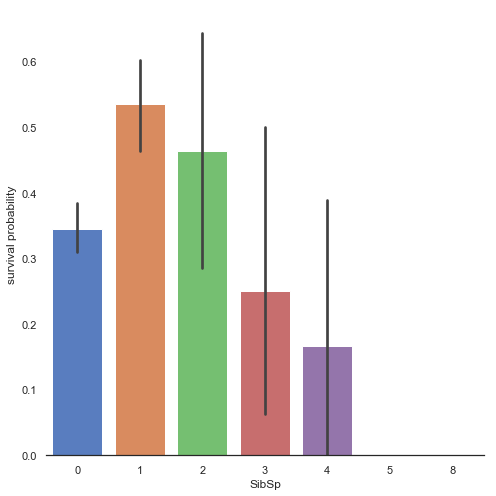

In [12]:
# 형제수에 따른 생존자 비율
# factorplot : 범주형 변수 그래프 그릴때 사용
g = sns.factorplot(x="SibSp", y = "Survived", data =train, kind = "bar", size = 7, palette = "muted")
g.despine(left =True)
g = g.set_ylabels("survival probability")
train[["SibSp", "Survived"]].groupby(["SibSp"]).mean().sort_values(by = "Survived", ascending = False)

Parch(함께 탑승한 부모 아이의 수)

,Survived
Parch,
0,678
1,118
2,80
3,5
5,5
4,4
6,1


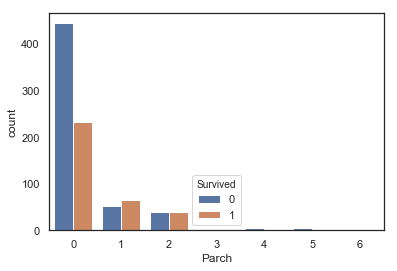

In [13]:
#  Parch에 따른 생존자 수
ax = sns.countplot(x = "Parch", hue = "Survived", data = train)
train[["Parch", "Survived"]].groupby(["Parch"]).count().sort_values(by = "Survived", ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


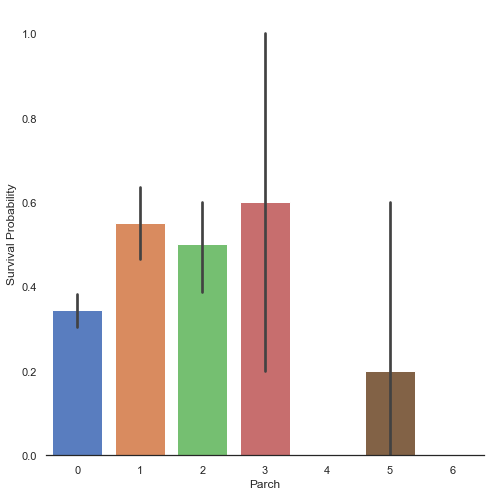

In [14]:
# parch에 따른 생존자 비율
g = sns.factorplot(x = "Parch", y = "Survived", data = train, kind = "bar", size = 7, palette = "muted")
g.despine(left = True)
g = g.set_ylabels("Survival Probability")
train[["Parch", "Survived"]].groupby(["Parch"]).mean().sort_values(by = "Survived", ascending = False)

Ticket(티켓번호)

In [15]:
train["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Fare(요금)


 mu = 32.20 and sigma = 49.67


Text(0.5, 1.0, 'Fare distribution')

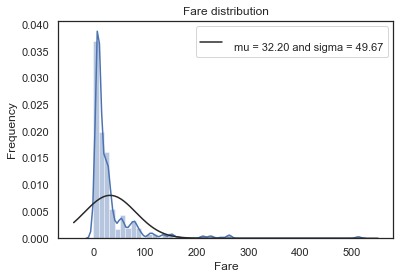

In [16]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(train["Fare"], fit = norm)

# 함수에 의해 튜닝된 매개변수 값
(mu, sigma) = norm.fit(train["Fare"])
print("\n mu = %.2f and sigma = %.2f" %(mu, sigma))

# 함수의 분포
plt.legend(["\n mu = %.2f and sigma = %.2f" %(mu, sigma)], loc = "best")
plt.ylabel("Frequency")
plt.title("Fare distribution")

# Fare는 우측왜도 분포를 보이므로 로그로 정규분포를 보이게 해야 한다.

Cabin(객실번호)

In [17]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Embarked(탑승항구)
S = Southampton
C = Cherbourg
Q = Queenstown

,Survived
Embarked,
S,644
C,168
Q,77


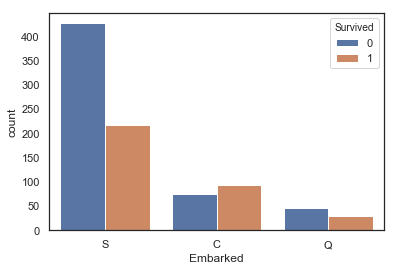

In [18]:
ax = sns.countplot(x = "Embarked",  hue = "Survived", data = train)
train[["Embarked", "Survived"]].groupby(["Embarked"]).count().sort_values(by = "Survived", ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


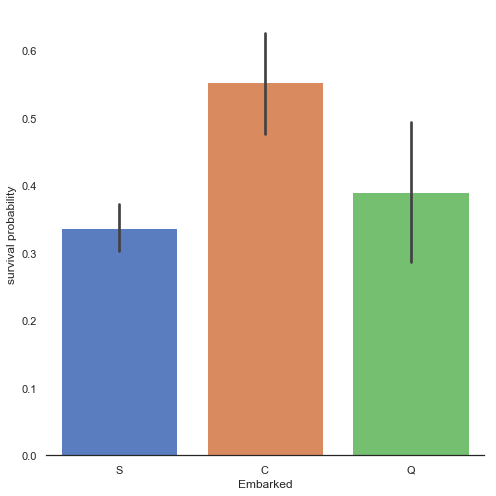

In [19]:
# 탑승항구에 따른 생존자 비율
g = sns.factorplot(x = "Embarked", y = "Survived", data = train, kind = "bar", size = 7, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["Embarked", "Survived"]].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

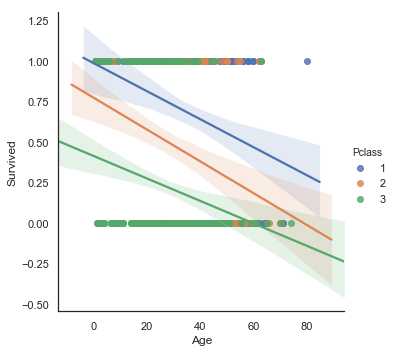

In [20]:
sns.lmplot("Age", "Survived", data = train, hue = "Pclass")

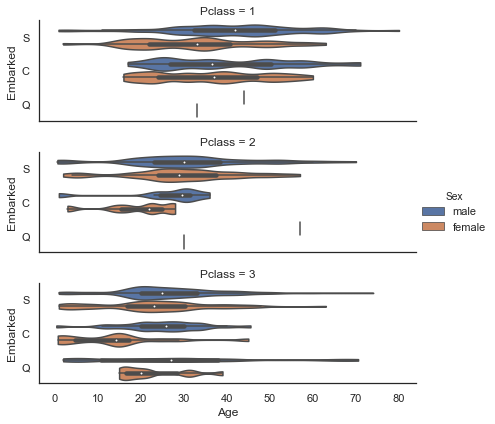

In [21]:
g = sns.catplot(x="Age", y="Embarked",  hue="Sex", row="Pclass",   data=train[train.Embarked.notnull()], 
orient="h", height=2, aspect=3,  kind="violin", dodge=True, cut=0, bw=.2)

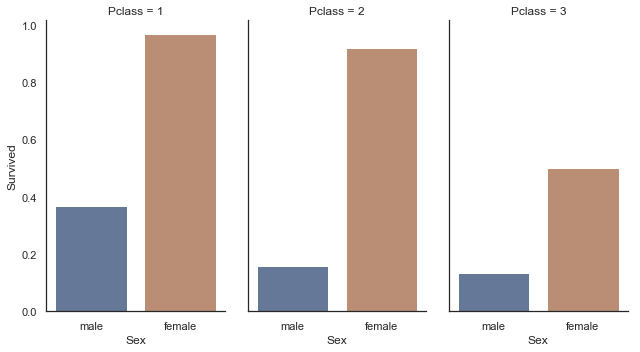

In [22]:
g = sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = train, saturation = .5, kind = "bar", ci = None, aspect = .6)

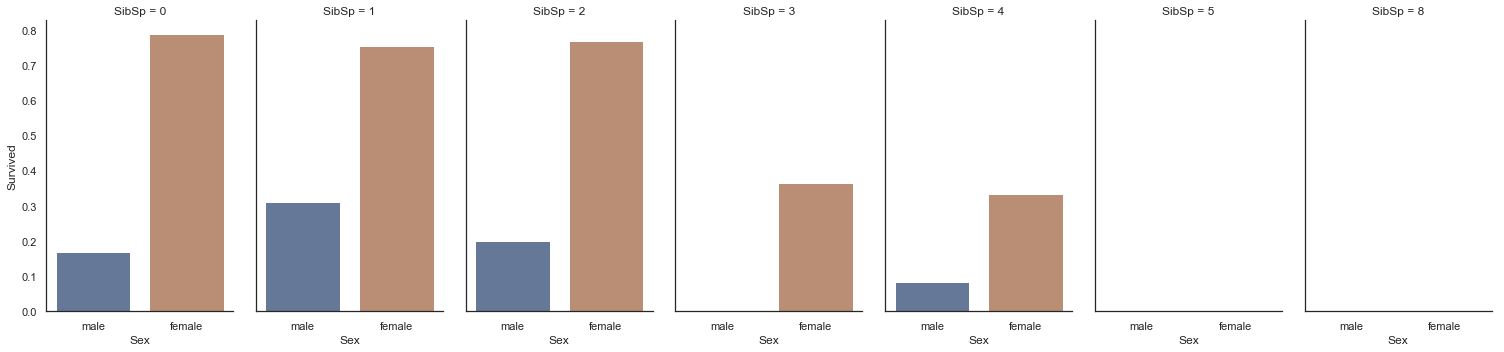

In [23]:
# Relation among SibSP, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="SibSp", data=train, saturation=.5,kind="bar", ci=None, aspect=.6)

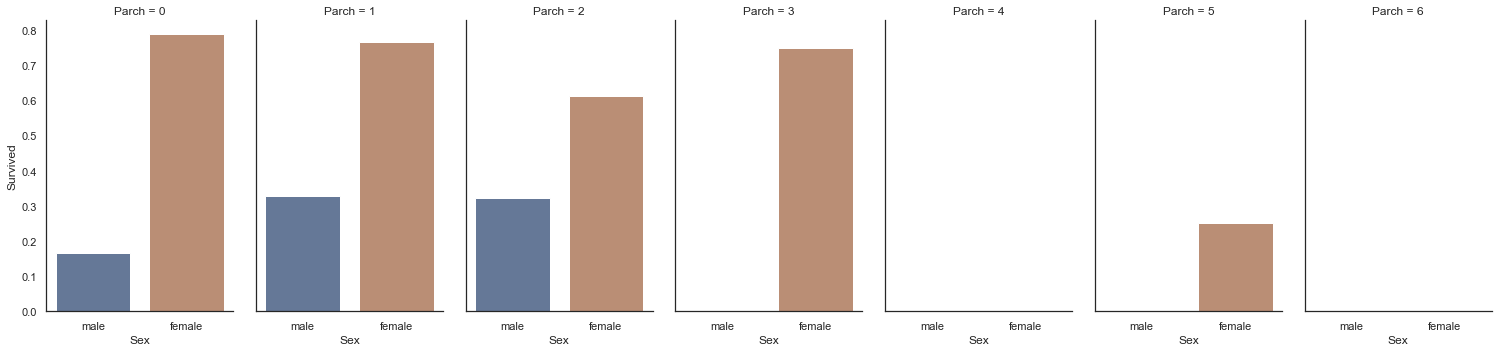

In [24]:
# Relation among Parch, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Parch", data=train, saturation=.5,kind="bar", ci=None, aspect=.6)

In [25]:
# 특성공학 : 특정 애플리케이션에서 가장 적합한 데이터 표현찾기
# 훈련 셋 테스트 셋 병합
train["source"] = "train"
test["source"] = "test"
combdata = pd.concat([train, test], ignore_index=True)
print (train.shape, test.shape, combdata.shape)

(891, 13) (418, 12) (1309, 13)


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


PaseengerID

In [26]:
# drop
combdata.drop("PassengerId", axis = True, inplace = True)

Pclass

In [27]:
combdata["Pclass"].unique()

array([3, 1, 2])

In [28]:
# Name
salutation = [ i.split(",")[1].split(".")[0].strip() for i in combdata["Name"]]
combdata["Title"] = pd.Series(salutation)
combdata["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [29]:
combdata["Title"] = combdata["Title"].replace("Mlle", "Miss")
combdata['Title'] = combdata['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
combdata.Title.loc[ (combdata.Title !=  'Master') & (combdata.Title !=  'Mr') & 
                   (combdata.Title !=  'Miss')  & (combdata.Title !=  'Mrs')] = 'Others'
combdata["Title"].value_counts()

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Mr        757
Miss      262
Mrs       201
Master     61
Others     28
Name: Title, dtype: int64

In [30]:
# inspect Title and Survived
combdata[["Title", "Survived"]].groupby("Title").mean()

,Survived
Title,
Master,0.575000
Miss,0.701087
Mr,0.156673
Mrs,0.796875
Others,0.318182


In [31]:
# Create dummy variable 
combdata = pd.get_dummies(combdata, columns = ["Title"])

Fare(요금

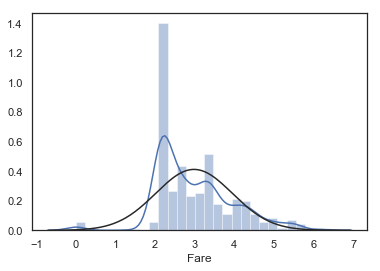

In [32]:
# Fare 결측치 확인
combdata["Fare"].isnull().sum()

#  1개의 결측치 중위수로 채우기
combdata["Fare"] = combdata["Fare"].fillna(combdata["Fare"].median())

# numpy의 log1p 함수를 사용해 변수 정적편포 변수 정규분포화
combdata["Fare"] = np.log1p(combdata["Fare"])

# 변화된 분포 확인
sns.distplot(combdata["Fare"], fit = norm)

In [33]:
# bin Fare 도잉ㄹ한 간격으로  5개 범위의 사람 분리
combdata["Fare-bin"] = pd.qcut(combdata.Fare, 5, labels=[1,2,3,4,5]).astype(int)

# Fare-bin 과 생존여부 확인
combdata[["Fare-bin", "Survived"]].groupby(["Fare-bin"], as_index=False).agg(["count", "mean"])

Survived          
            count      mean
Fare-bin                   
1             179  0.217877
2             184  0.201087
3             171  0.426901
4             185  0.443243
5             172  0.645349

Age  
  나이의 결측치를 채우기 위해 2가지 방법을 사용한다. 1. 중위수 2. 예측

In [34]:
# Pclass, Sex, Parch and SibSp 활용
# missing_index = list(combdata["Age"][combdata["Age"].isnull()].index)

# for i in missing_index:
#     median_age = combdata["Age"].median()
#     filled_age = combdata["Age"][((combdata["Sex"] == combdata.iloc[i]["Sex"]) &
#                                   (combdata["SibSp"] == combdata.iloc[i]["SibSp"]) &
#                                  (combdata["Parch"] == combdata.iloc[i]["Parch"]) &
#                                  (combdata["Pclass"] == combdata.iloc[i]["Pclass"]))].median()
#     if not np.isnan(filled_age):
#         combdata["Age"].iloc[i] = filled_age
#     else:
#         combdata["Age"].iloc[i] = median_age

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
combdata_temp = combdata[["Age", "Title_Master", "Title_Miss", "Title_Mrs", "Title_Others", 
                          "Fare-bin", "SibSp"]]
X = combdata_temp.dropna().drop("Age", axis = 1)
Y = combdata["Age"].dropna()
# 결측치를 가진 행은 = test set
holdout = combdata_temp.loc[np.isnan(combdata.Age)].drop("Age", axis = 1)

regressor = RandomForestRegressor(n_estimators=300)
# regressor = GradientBoostingRegressor(n_estimators = 500)
regressor.fit(X,Y)
y_pred = np.round(regressor.predict(holdout), 1)
combdata.Age.loc[combdata.Age.isnull()] = y_pred

combdata.Age.isnull().sum(axis = 0)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0

In [36]:
bins = [0, 4, 12, 18, 30, 50, 65, 100]
age_index = (1,2,3,4,5,6,7)

combdata["Age-bin"] = pd.cut(combdata.Age, bins, labels = age_index).astype(int)
combdata[["Age-bin", "Survived"]].groupby(["Age-bin"], as_index=False).agg(["mean", "count"])

Survived      
             mean count
Age-bin                
1        0.675000    40
2        0.452381    42
3        0.402597    77
4        0.315789   380
5        0.427083   288
6        0.375000    56
7        0.125000     8

Sex

In [37]:
# Sex(성별) = 더미변수 생성
combdata["Sex"] = combdata["Sex"].map({"male": 0, "female":1})
# pd.get_dummies(combdata, columns = ["Sex"])

In [38]:
# 가족수 변수 생성
combdata["Fsize"] = combdata["SibSp"] + combdata["Parch"] + 1

# 가족수와 생존여부 변수 상관관계 확인
combdata[["Fsize", "Survived"]].groupby(["Fsize"], as_index=False).mean()

,Fsize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,Survived
Fsize,
4,0.724138
3,0.578431
2,0.552795
1,0.303538
0,0.161290


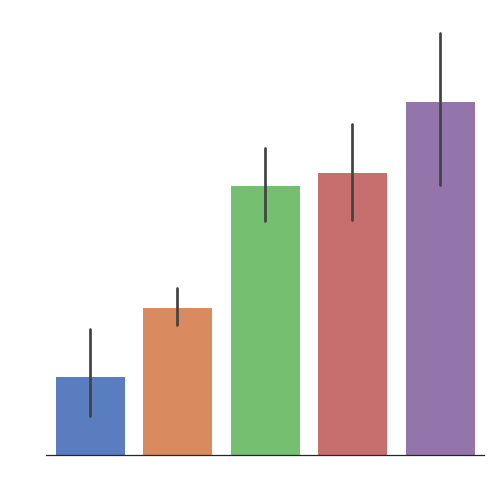

In [39]:
# 가족수 변수 분석
combdata.Fsize = combdata.Fsize.map(lambda x: 0 if x > 4 else x)
g = sns.factorplot(x = "Fsize", y = "Survived", data = combdata, kind = "bar", size = 7, palette = "muted")
g.despine(left=True)
g.set_ylabels("Survival Probability", color = "white")
g.set_xlabels("Family Size", color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
combdata[["Fsize", "Survived"]].groupby(["Fsize"]).mean().sort_values(by = "Survived", ascending = False)


SibSp Parch

In [40]:
# drop SibSp Parch
combdata = combdata.drop(["SibSp", "Parch"], axis = 1)

## Ticket    
티켓은 2가지 유형이 있다. 하나는 숫자 만 있고 다른하나는 숫자와 코드가 같이있다.
  

In [41]:
# Ticket = Extracting the ticket prefix. This might be a representation of class / compartment.

combdata.Ticket = combdata.Ticket.map(lambda x: x[0])

# 티켓과 생존여부 확인
combdata[["Ticket", "Survived"]].groupby(["Ticket"], as_index=False).agg(["count", "mean"])

Survived          
          count      mean
Ticket                   
1           146  0.630137
2           183  0.464481
3           301  0.239203
4            10  0.200000
5             3  0.000000
6             6  0.166667
7             9  0.111111
8             2  0.000000
9             1  1.000000
A            29  0.068966
C            47  0.340426
F             7  0.571429
L             4  0.250000
P            65  0.646154
S            65  0.323077
W            13  0.153846

In [42]:
combdata["Ticket"].value_counts()
combdata["Ticket"] = combdata["Ticket"].replace(["A", "W", "F", "5", "6", "7", "8", "9", "L"], 4)

# 확인
combdata[["Ticket", "Survived"]].groupby(["Ticket"], as_index = False).mean()

,Ticket,Survived
0,4,0.162162
1,1,0.630137
2,2,0.464481
3,3,0.239203
4,4,0.200000
5,C,0.340426
6,P,0.646154
7,S,0.323077


In [43]:
# 더미변수 생성
# prefitx : 변수 앞에 
combdata = pd.get_dummies(combdata, columns = ["Ticket"], prefix = "T")

Cabin(객실번호)

In [44]:
# Cabin - 결측치를  U 로 대체 (unknown)
combdata["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else "U" for i in combdata["Cabin"]] )

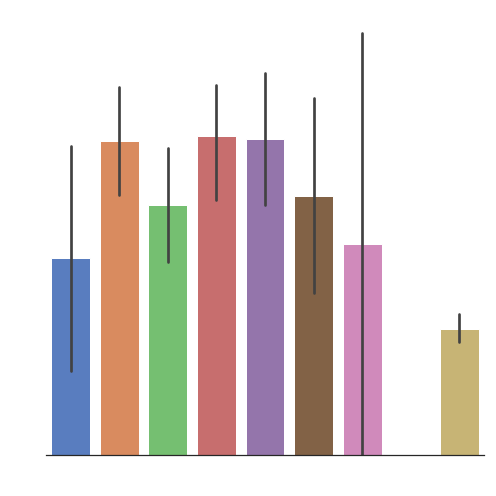

In [49]:
# 시각화
g = sns.factorplot(x = "Cabin", y = "Survived", data = combdata, kind = "bar", size = 7,
                  palette = "muted", order = ["A", "B", "C", "D", "E", "F", "G", "T", "U"])
g.despine(left = True)
g.set_ylabels("survival probability", color = "white")
plt.xticks(color = "white")
plt.yticks(color = "white")
g.set_xlabels(color = "white")

In [54]:
combdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
Pclass          1309 non-null int64
Sex             1309 non-null int64
Survived        891 non-null float64
source          1309 non-null object
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Others    1309 non-null uint8
Fare-bin        1309 non-null int64
Age-bin         1309 non-null int64
Fsize           1309 non-null int64
T_4             1309 non-null uint8
T_1             1309 non-null uint8
T_2             1309 non-null uint8
T_3             1309 non-null uint8
T_4             1309 non-null uint8
T_C             1309 non-null uint8
T_P             1309 non-null uint8
T_S             1309 non-null uint8
dtypes: float64(1), int64(5), object(1), uint8(13)
memory usage: 88.3+ KB


In [55]:
from sklearn.svm import SVC
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [60]:
#  테스트 셋 훈련 셋 분리
train = combdata.loc[combdata["source"] == "train"]
test = combdata.loc[combdata["source"] == "test"]
test.drop(labels = ["Survived", "source"], axis = 1, inplace = True) # inplace : 바로 삭제 가능
train.drop(labels = ["source"], axis = 1, inplace = True)
test.shape

(418, 18)

In [63]:
#  훈련셋 종속변수, 독립변수 분리
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"], axis = 1)

X_train.shape

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(891, 18)

In [64]:
# k-fold 교차검증
kfold = StratifiedKFold(n_splits=10)

Text(0.5, 1.0, 'Cross validation scores')

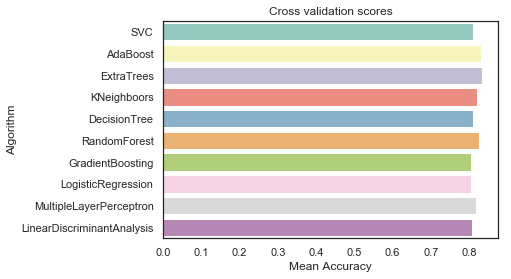

In [72]:
# Modeling differents algorithms.

random_state = 2
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                      random_state=random_state, learning_rate=0.1))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy",
                                     cv = kfold, n_jobs = 4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means, "CrossValerrors":cv_std,
                      "Algorithm":["SVC",
                                  "AdaBoost", "ExtraTrees", "KNeighboors", "DecisionTree",
                                  "RandomForest", "GradientBoosting", "LogisticRegression", "MultipleLayerPerceptron",
                                  "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans", "Algorithm", data = cv_res, palette = "Set3", orient = "h")
g.set_xlabel("Mean Accuracy")
g.set_title("Cross validation scores")